In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Visualize the dataset

Target labels:  [5 8 3 2 0 0 6 8 8 9]


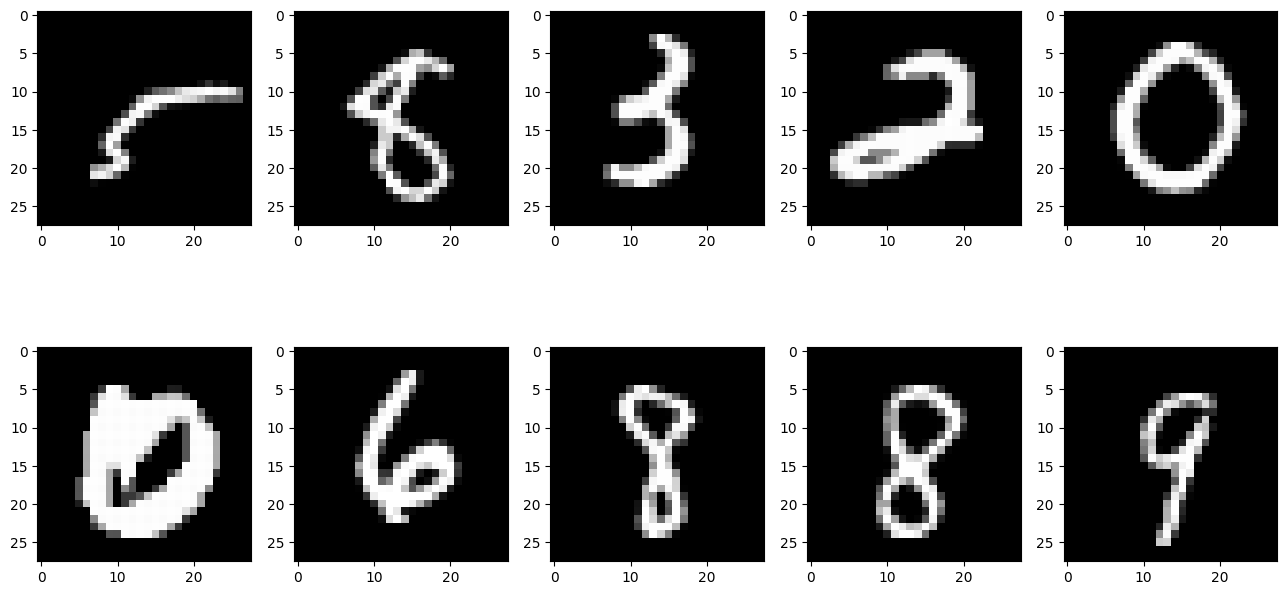

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8444 - loss: 0.5107
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9591 - loss: 0.1337
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9718 - loss: 0.0935
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9770 - loss: 0.0729
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9804 - loss: 0.0586
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0468
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9867 - loss: 0.0412
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0369
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9898 - loss: 0.0300
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0281


Plot the loss and accuracy graphs

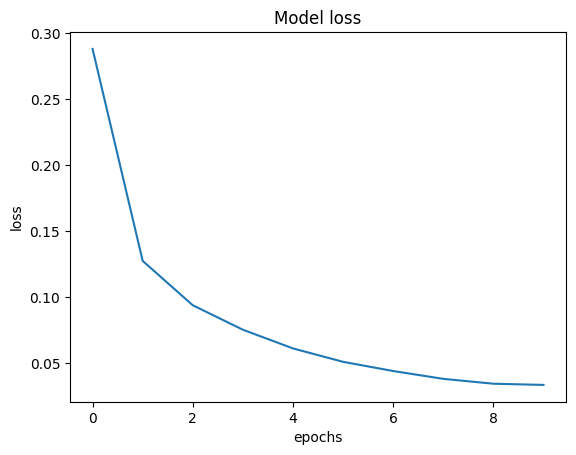

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

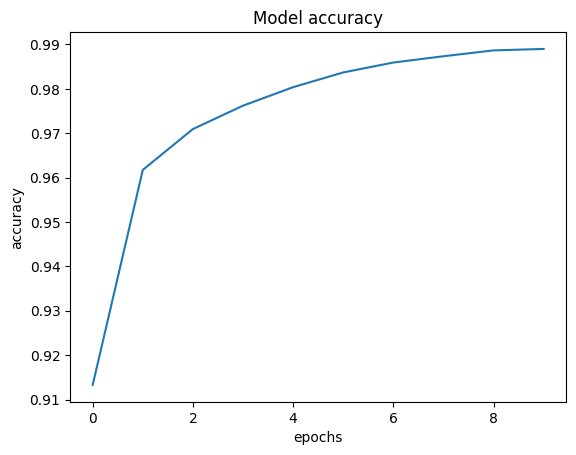

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9690 - loss: 0.1207
Loss of the Test dataset is: 0.10180060565471649
Accuracy of the test dataset is: 0.9747999906539917


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8027 - loss: 0.6249 - val_accuracy: 0.9572 - val_loss: 0.1421
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9483 - loss: 0.1657 - val_accuracy: 0.9670 - val_loss: 0.1078
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9615 - loss: 0.1260 - val_accuracy: 0.9747 - val_loss: 0.0854
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9689 - loss: 0.1004 - val_accuracy: 0.9728 - val_loss: 0.0858
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9734 - loss: 0.0848 - val_accuracy: 0.9746 - val_loss: 0.0833
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9761 - loss: 0.0737 - val_accuracy: 0.9772 - val_loss: 0.0759
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9765 - loss: 0.0720 - val_accuracy: 0.9779 - val_loss: 0.0703
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9793 - loss: 0.0680 - val_accuracy:

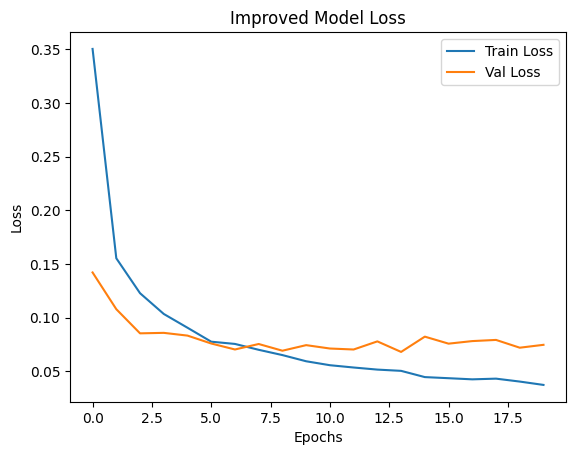

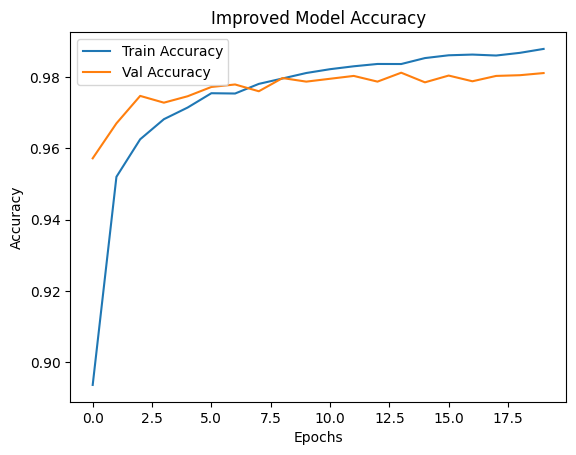

Loss on test data: 0.0747
Accuracy on test data: 0.9811


In [11]:
# ===== Part (a) - Improve model test accuracy =====

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Build improved model
improved_model = Sequential()
improved_model.add(Flatten(input_shape=(28, 28)))
improved_model.add(Dense(128, activation='relu'))
improved_model.add(Dropout(0.2))
improved_model.add(Dense(128, activation='relu'))
improved_model.add(Dropout(0.2))
improved_model.add(Dense(64, activation='relu'))
improved_model.add(Dense(10, activation='softmax'))

# Compile with adjusted learning rate
optimizer = Adam(learning_rate=0.001)
improved_model.compile(loss='categorical_crossentropy',
                       optimizer=optimizer, metrics=['accuracy'])

# Train
train_info = improved_model.fit(new_train_data, new_train_target,
                                epochs=20, batch_size=64,
                                validation_data=(new_test_data, new_test_target),
                                verbose=1)

# Plot loss
plt.plot(train_info.history['loss'], label='Train Loss')
plt.plot(train_info.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Improved Model Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(train_info.history['accuracy'], label='Train Accuracy')
plt.plot(train_info.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Improved Model Accuracy')
plt.legend()
plt.show()

# Evaluate
loss, acc = improved_model.evaluate(new_test_data, new_test_target, verbose=0)
print(f'Loss on test data: {loss:.4f}')
print(f'Accuracy on test data: {acc:.4f}')


In [ ]:
# ===== Part (b) - Add L1 and L2 regularization =====

from tensorflow.keras import regularizers

# Build model with regularization
reg_model = Sequential()
reg_model.add(Flatten(input_shape=(28, 28)))
reg_model.add(Dense(128, activation='relu',
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
reg_model.add(Dense(128, activation='relu',
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
reg_model.add(Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
reg_model.add(Dense(10, activation='softmax'))

# Compile
reg_model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train
reg_train_info = reg_model.fit(new_train_data, new_train_target,
                               epochs=20, batch_size=64,
                               validation_data=(new_test_data, new_test_target),
                               verbose=1)

# Evaluate
loss, acc = reg_model.evaluate(new_test_data, new_test_target, verbose=0)
print(f'Regularized Model Loss: {loss:.4f}')
print(f'Regularized Model Accuracy: {acc:.4f}')


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8216 - loss: 2.8285 - val_accuracy: 0.9114 - val_loss: 0.9582
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9114 - loss: 0.8850 - val_accuracy: 0.9235 - val_loss: 0.7103
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9269 - loss: 0.6832 - val_accuracy: 0.9309 - val_loss: 0.6016
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9339 - loss: 0.5932 - val_accuracy: 0.9344 - val_loss: 0.5538
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9371 - loss: 0.5474 - val_accuracy: 0.9366 - val_loss: 0.5144
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9409 - loss: 0.5140 - val_accuracy: 0.9449 - val_loss: 0.4830
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9432 - loss: 0.4861 - val_accuracy: 0.9484 - val_loss: 0.4556
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9436 - loss: 0.4746 - val_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


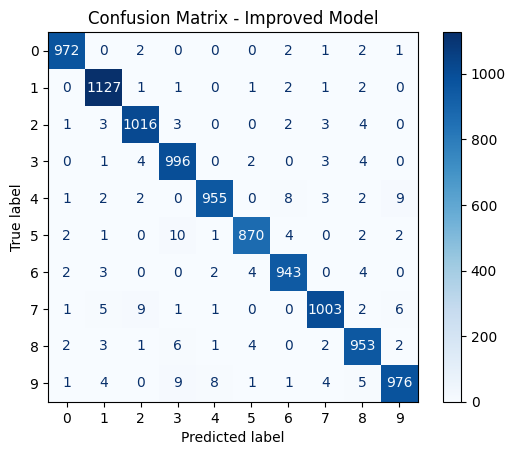

In [ ]:
# ===== Part (c) - Confusion Matrix =====

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict classes for the test set
y_pred_probs = improved_model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(new_test_target, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix - Improved Model')
plt.show()


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=MNIST_WEIGHTS_V1.h5